<a href="https://colab.research.google.com/github/Alfonso-Jesus-Garcia-Moya/Tecnicas_de_inteligencia_artificial/blob/main/SEMANA%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 10. Búsqueda y metaheurísticos en IA: problema del agente viajero

### Problema del agente viajero (caso práctico)

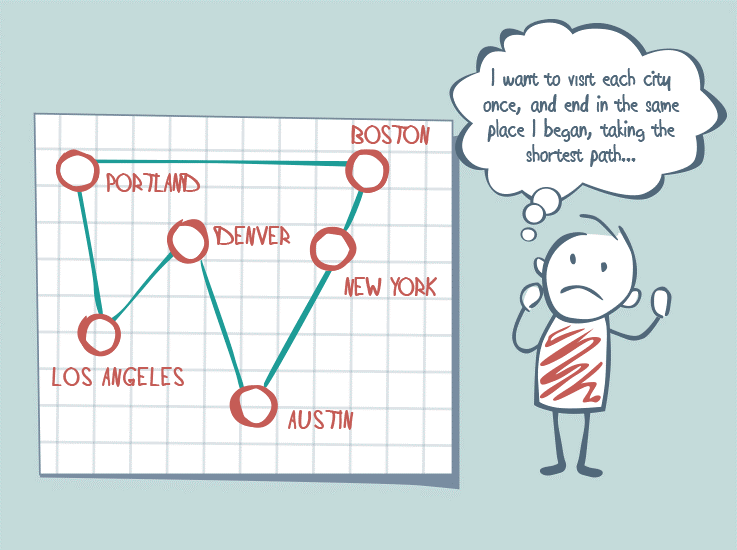

El agente viajero es un problema clásico donde un agente debe recorrer un entorno (ya sea cuadrícula o mapa) desde un punto inicial hasta un destino final, minimizando la distancia o el costo del recorrido y evitando obstáculos

Este problema sirve como base para comprender distintos enfoques de búsqueda como anteriormente lo vimos en la sesión pasada:

* búsqueda ciega (sin conocimiento del entorno)
* búsqueda informada (usando heurísticas o estimaciones)

El problema del agente viajero consiste en que dadas n ciudades que tiene que visitar un vendedor, se requiere encontrar el camino más corto para que, partiendo de cualquiera de ellas, se puedan visitar todas sin pasar más de una vez por alguna de ellas y volviendo, finalmente, a la ciudad de partida

Es como si fueramos turistas llegando a un aeropuerto específico del que tenemos que salir después para retornar a nuestro país. En este sentido, se toma ese aeropuerto como punto de partida para visitar todas las ciudades posibles sin tener que pasar por una que ya hayamos visitado ...

Imaginemos que llegamos a un aeropuerto de China y queremos visitar todas las ciudades sin repetir alguna...

* ¿Cuántas posibilidades existen?
* ¿Cuál es la ruta más óptima?

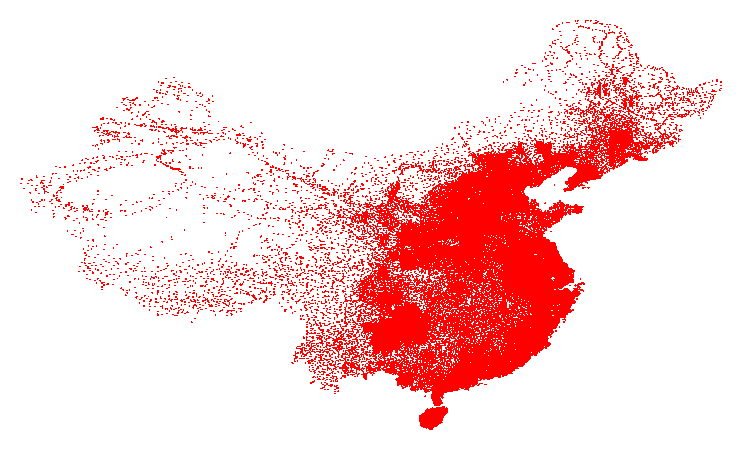

##### BFS

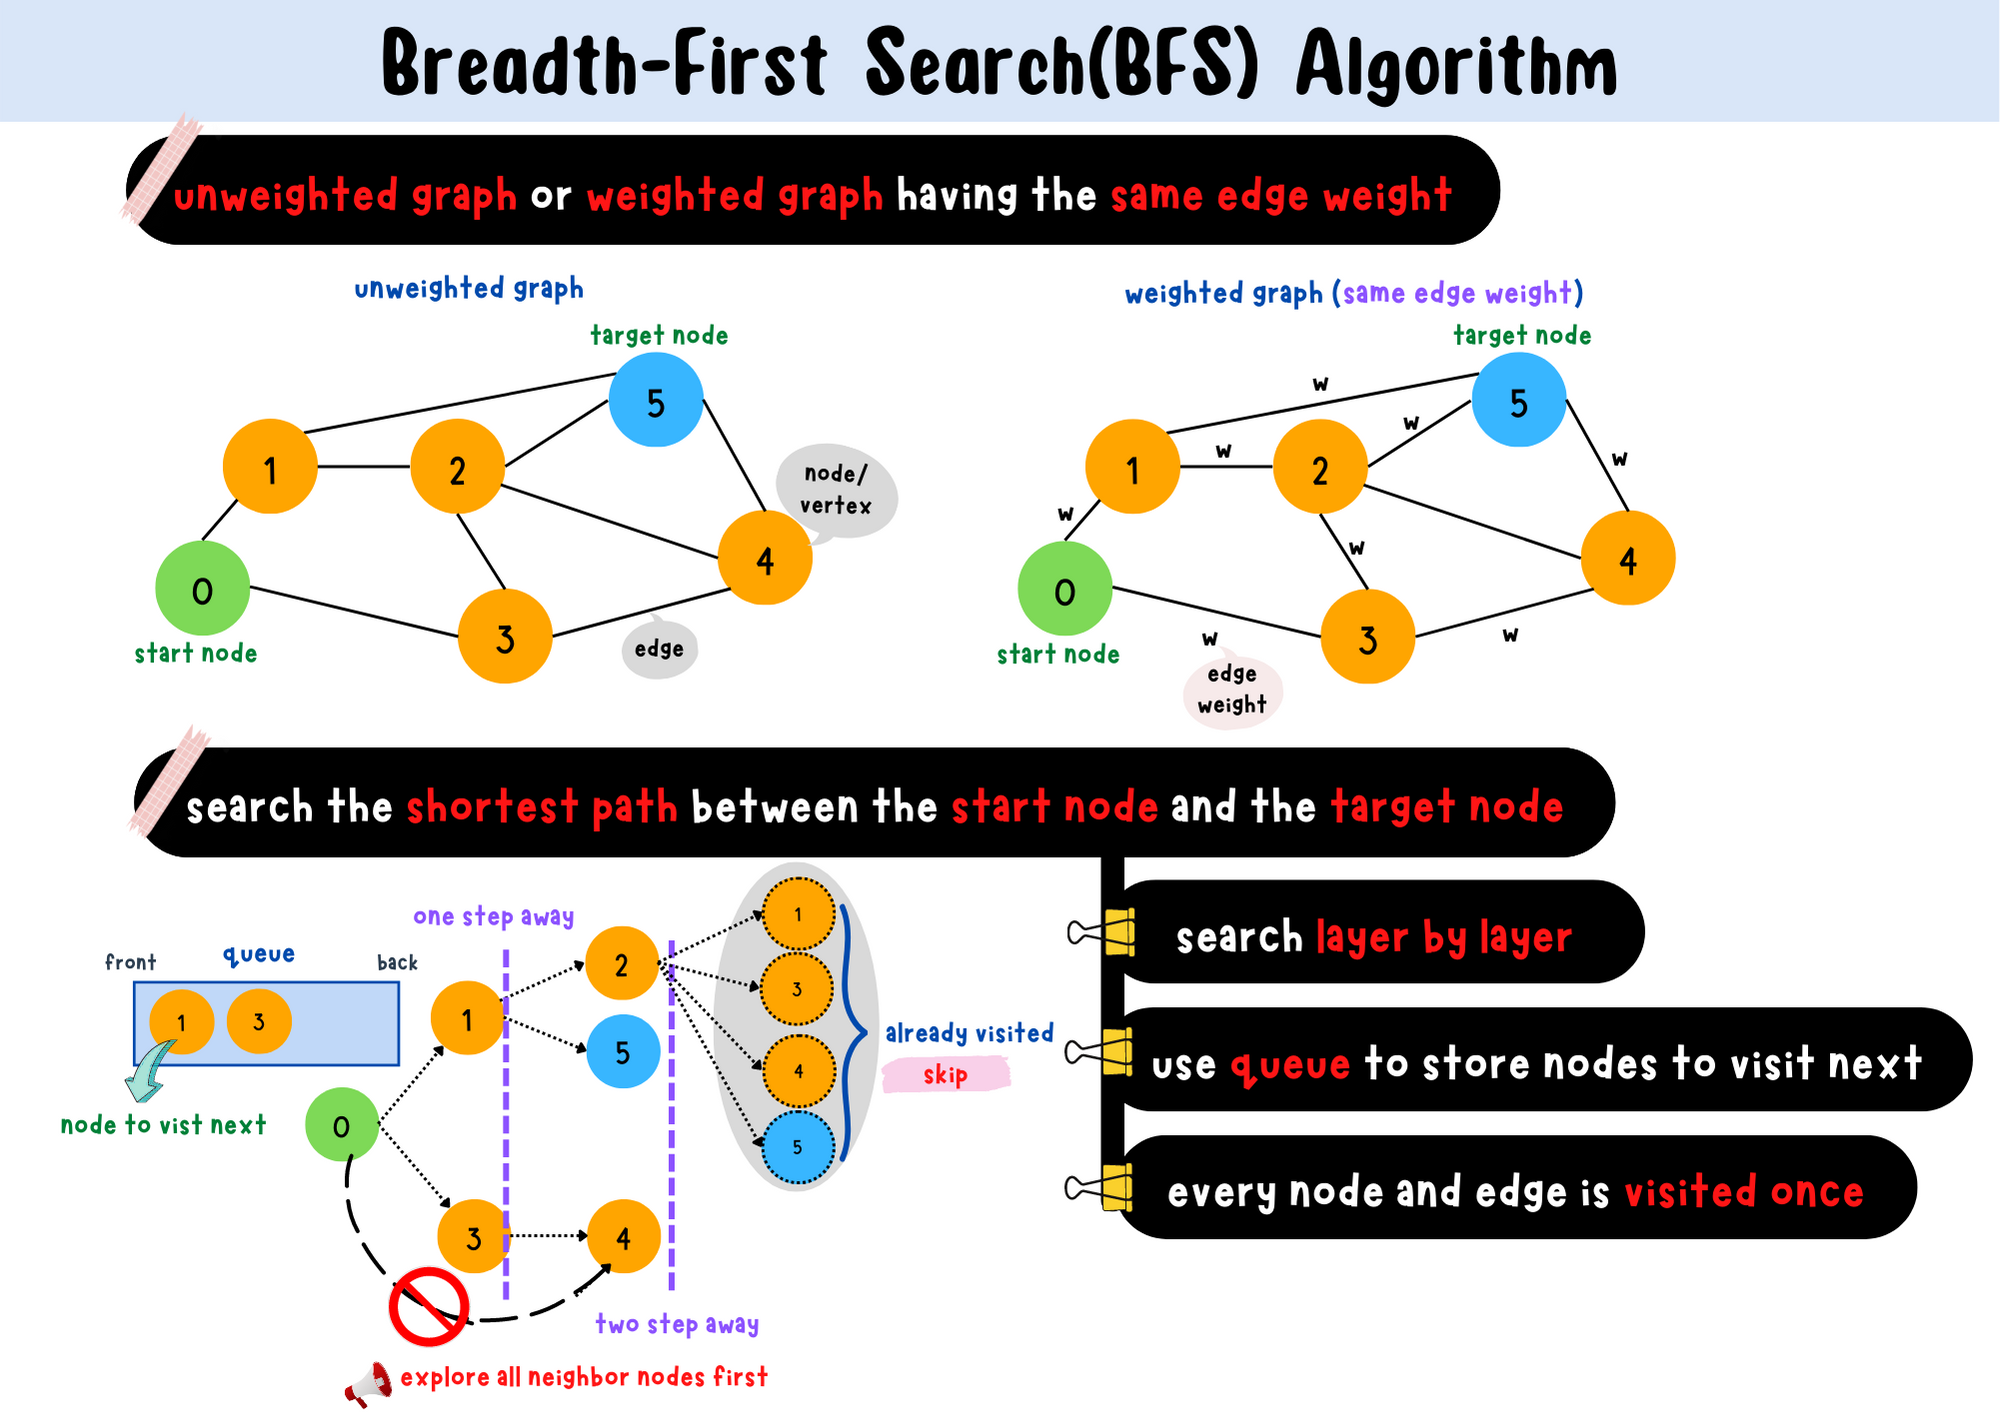

https://yuminlee2.medium.com/breadth-first-search-bfs-algorithm-b93ef5258c4d

Explora todas las rutas posibles nivel por nivel, es decir, por número de ciudades visitadas

Entonces cada nodo representa una ruta parcial.
Por ejemplo, si queremos visitar A → B → C

* Desde cada nodo, se expande a todos los posibles siguientes destinos no visitados

* Se exploran primero las rutas más cortas (en relación a la cantidad de pasos)

* Cuando una ruta incluye todas las ciudades, regresa al inicio y se calcula su costo total

El agente viajero debe:

* empezar en una celda S, por ejemplo (0, 0)
* después busca llegar a una meta G, por ejemplo (n-1, n-1)
* solo podrá moverse una celda por turno (arriba, abajo, izquierda o derecha)
* algunas celdas son obstáculos que no puede atravesar
* así, cada movimiento tiene el mismo costo (1 unidad de distancia)

Como es un algoritmo ciego, no tiene ninguna idea de dónde está la meta ubicada, porque solo sabe que debe explorar todas las ruras posibles en orden de distancia

Ejemplo en una rejilla de 5 x 5 sin obstáculos

In [ ]:
#S . . . .
#. . . . .
#. . . . .
#. . . . .
#. . . . G


El algoritmo trabaja de la siguiente manera:

* empieza de la celda superior izquierda
* expande sucesivamente todas las celdas accesibles, una capa a la vez
* si encuentra la meta, reconstruye el camino m ás corto
* si no hay camino (porque todos los obstáculos bloquean), entonces lo informa


La estrategia es la siguiente:

* comienza desde el nodo inicial (start = S)
* explora todos los nodos vecinos de S (las celdas a una distancia de 1)
* luego explora todos los vecinos de esos vecinos (celdas a una distancia de 2)
* y repite sucesivamente, por capas, hasta encontrar la meta (goal = G)

Así el orden de expansión y en términos de números de pasos es:

In [ ]:
#0 1 2 3 4
#1 2 3 4 5
#2 3 4 5 6
#3 4 5 6 7
#4 5 6 7 8


Cada número indica en qué capa se exploró cada celda, demostrando que BFS explora uniformemente hacia afuera, como si fuera una ola que se expande desde el punto inicial

Ventajas


* Garantiza encontrar la solución óptima (la ruta más corta)

Desventajas:

* Es exponencialmente lento: si hay n ciudades, hay n! rutas posibles

* Incluso con 15 ciudades, el espacio es inmenso

* Solo es útil para casos muy pequeños (5 o 6 ciudades)

En resumen:

* actúa como un explorador sistemático que recorre todas las rutas posibles sin tener idea de hacia dónde ir
* es útil para encontrar el camino más corto, pero no para hacerlo rápidamente en espacios grandes

##### A*

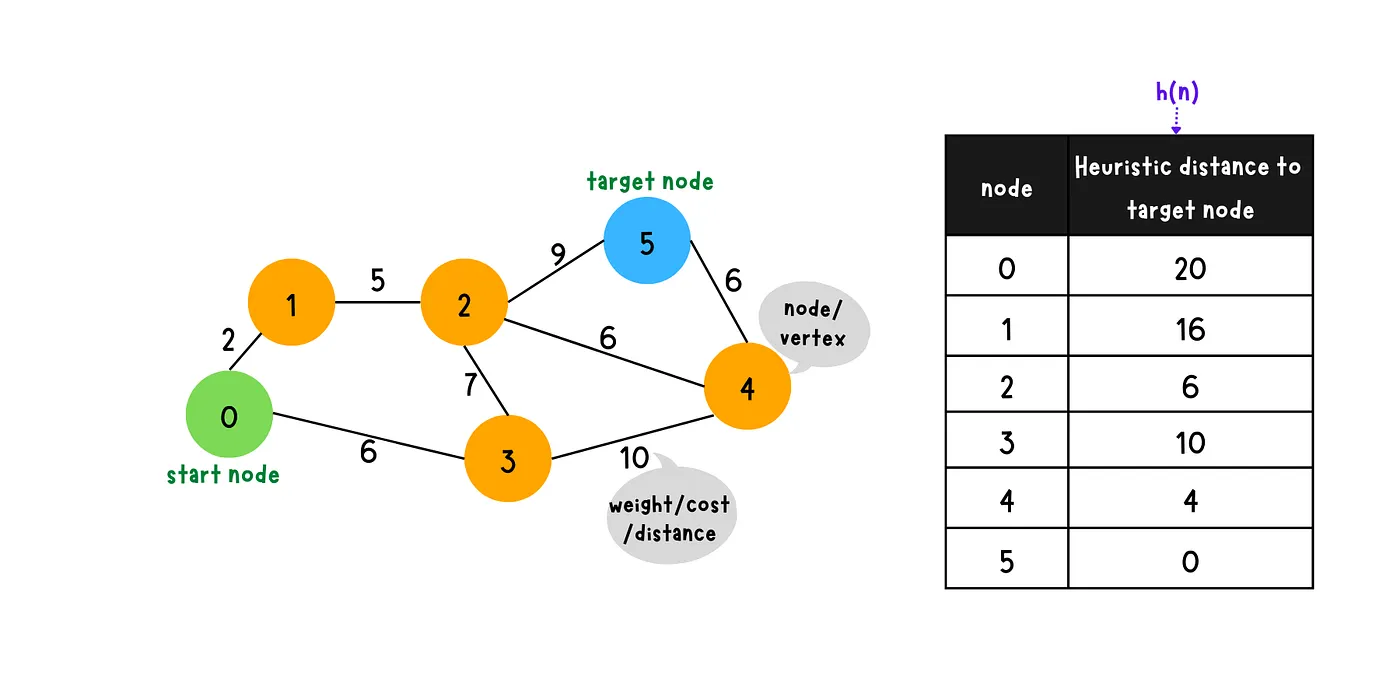

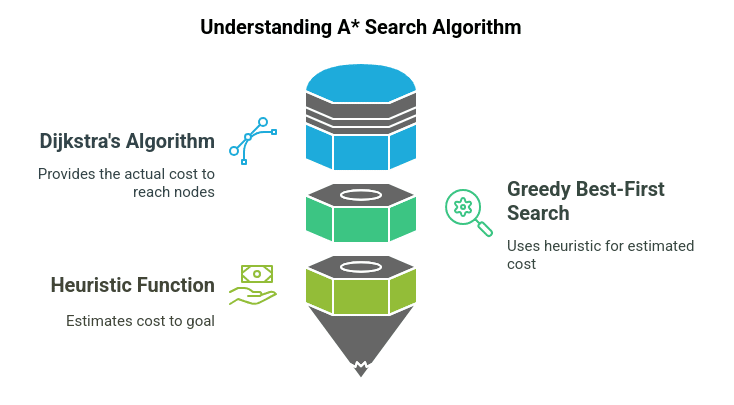

https://yuminlee2.medium.com/a-search-algorithm-42c1a13fcf9f

Algoritmo de búsqueda informada, es decir, usa conocimiento adicional del problema para decidir a qué nodo ir primero

Usa una función heurística que estima el costo faltante para guiar la búsqueda hacia rutas prometedoras

Mientras BFS expande los nodos por orden de llegada, A* prioriza los nodos según una función de evaluación:

f (n) = g(n) + h(n)

donde:
* g(n) es el costo real desde el inicio hasta el nodo actual
* h(n) es el costo estimado desde ese nodo hasta la meta (heurística)
* f(n) es el costo total estimado (real + estimado)

De esta forma, A* siempre elige el nodo con menor valor de f(n)

El agente viajero debe:

* empezar en una celda S, por ejemplo (0, 0)
* después busca llegar a una meta G, por ejemplo (n-1, n-1)
* solo podrá moverse una celda por turno (arriba, abajo, izquierda o derecha)
* algunas celdas son obstáculos que no puede atravesar
* así, cada movimiento tiene el mismo costo (1 unidad de distancia), igual que BFS

La diferencia es que A* no busca al azar ni por capas: usa una estimación inteligente para decidir qué caminos son más prometedores

Ejemplo de heurísticas:

* La suma de las distancias mínimas entre las ciudades aún no visitadas
* El árbol de expansión mínima de las ciudades restantes

En el problema del agente viajero, la heurística usada es la distancia Manhattan, porque el agente solo puede moverse en cuatro direcciones (sin diagonales)

Esta heurística mide cuántos pasos mínimos faltan en línea recta hasta la meta, ignorando los obstáculos

Ejemplo en una rejilla de 5 x 5 sin obstáculos

In [ ]:
#S . . . .
#. . . . .
#. . . . .
#. . . . .
#. . . . G


* BFS expande en forma de círculos concéntricos
* A* expande en forma de embudo orientado hacia G

Si se agregaran obstáculos, A* rodeará los bloques, pero manteniendo la direcciín general hacia la meta en lugar de explirar todo el mapa

Durante la ejecución, A* mantiene una cola de prioridad, donde cada nodo tiene asociado su valor de f(n) = g + h

nodo actual (2,3)

g(n) = 5  #pasos reales desde 5

h(n) = 6  #distancia Manhattan hasta G

f(n) = 11 #prioridad total

De esta forma, el algoritmo elegirá expandir primero el nodo con menor f(n), que es el menor costo estimado total

El algoritmo trabaja de la siguiente manera:

* se coloca el nodo inicial S en la cola con f=0
* se expande sacando el nodo con menor f de la cola
* se evalúan los vecinos calculando *f = g + h* para cada vecino libre
* se actualizan las prioridades, es decir, los nodos con menor f se expanden antes
* cuando el nodo actual es la meta G, se reconstruye el camino

ASí, la estrategia es:

* el agente se expande principalmente hacia la meta, no en todas direcciones
* los obstáculos se esquivan naturalmente, es decir, el valor de h(n) sigue guiando el movimiento hacia el destino
* el número de nodos expandidos será menor que con BFS
* la longitud del camino será igual o muy similar

Si, por ejemplo, la densidad de obstáculos es moderada entre 0.2-0.3, entonces:

* BFS puede expandir entre 100-200 nodos
* A* suele hacerlo con 30-60 nodos

Esto demuestra que A* encuentra el mismo camino, pero con menos exploración

Ventajas

* Mucho más eficiente que BFS

Desventajas

* Todavía puede ser costoso si hay muchas ciudades (complejidad factorial en el peor caso)

* Necesita diseñar una buena heurística para ser práctico

En resumen, A* combina la precisión sistemática de BFS con la intuición de una guía heurística

En el problema del agente viajero, actúa como un explorador que no solo avanza, sino que evalúa qué caminos parecen más prometedores antes de tomarlos

##### Hill Climbing

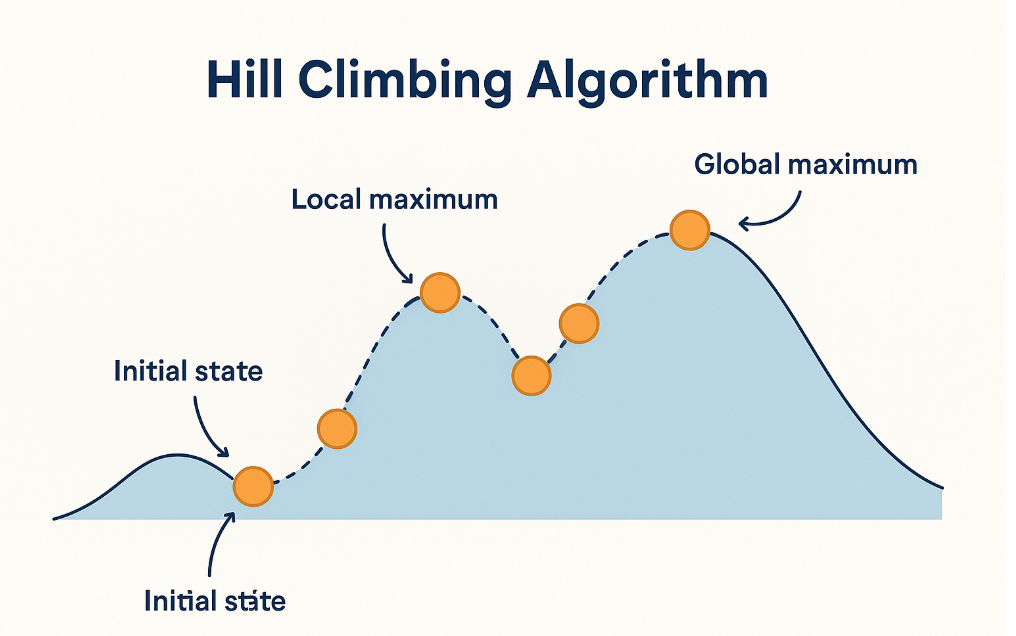

https://www.skillcamper.com/blog/hill-climbing-algorithm-in-artificial-intelligence

Es un algoritmo heurístico local que observa su vecindario inmediato  y decide moverse si mejora la solución actual

Parte de una ruta completa, por ejemplo, una permutación aleatoria de ciudades, mejorándola localmente intercambiando el orden de las ciudades

En el problema del agente viajero, se tiene un conjunto de posibles rutas o configuraciones que el agente puede tomar para ir de su punto de inicio S hasta su destino G

En términos conceptuales, se puede decir que:

* cada ruta posible es una solución candidata
* la distancia total o el tiempo de recorrido es su valor de costo
* el objetivo es minimizar el costo o maximizar la eficiencia del camino

Hill climbing no busca en un mapa de celdas como BFS o A*, sino en un espaico de soluciones

Este espacio se puede imaginar ocmo un paisaje de montañas y valles, donde:

* las colinas son soluciones mejores
* los valle sosn soluciones peores
* el objetivo es subir hasta la cima más alta (la mejor solución)

Su estrategia es:

* se genera una ruta inicial al azar
* evalúa las soluciones vecinas, que pueden ser rutas ligeramente diferentes
* si alguna es mejor, se muve hacia ella
* repite hasta que no encuentre ninguna mejora
* en ese momento, el algoritmo piensa que ha llegado a la cima, aunque bien podría estar en una colina local, no global

Por ejemplo, si fueras un agente viajero en un terreno montañoso cubierto por niebla:

* solo se puede ver lo que se tiene al alrededor inmediato
* si la pendiente sube, se avanza hacia esa dirección
* si ya no sube, se detiene el avance (aunque bien podría haber una montaña más alta más lejos)


Esto refleja el comportamiento perfecto del algoritmo:

* se guía solo por mejoras locales
* no retrocede ni explora ampliamente como BFS o A*

En el problema del agente viajero el algoritmo se aplica de la siguiente manera:

* se genera una ruta aleatoria, como visitar ciudades en orden aleatorio
* se calcula la longitud total, la distancia total recorrida
* se crean rutas vecinas, como intercambiar dos ciudades en el orden
* se mueve a la ruta vecina si tiene la menor distancia
* la ruta encontrada es el óptimo local, que puede no ser la mejor global

* Así, cada punto x equivale a una ruta posible del viajero
* el valor de f(x) rerpresenta qué tan buena es la ruta: podría ser qué tan corta
* el paso del algoritmo equivale a cambiar ligeramente la ruta, como intercambiar dos destinos
* si la nueva ruta es mejor, menor distancia, entonces de adopta
* si no mejora, el agente se detiene

El algoritmo Hill climbign aprende solo de su experiencia inmediata y mejora su camino poco a poco, pero no siempre ecnuentra la mejor ruta posible

Este algoritmo representa el primer paso hacia los algoritmos de optimización adaptativa

A diferencia de BFS y A*, no busca exhaustivamente ni usa un mapa heurístico global, sino que:

* aprende de la experiencia local
* mejora interativamente
* puede reiniciarse para buscar mejores regiones del espacio de soluciones


Ventajas

* Muy rápido y fácil de implementar
* Útil para obtener soluciones aproximadas en poco tiempo

Desventajas

* No garantiza encontrar el óptimo global
* Puede quedarse atrapado en un mínimo local (una ruta que no puede mejorar con pequeños cambios)


##### BFS vs A* vs Hill Climbing

* BFS representa la búsqueda exhaustiva sin conocimiento
* A* representa la búsqueda informada con conocimiento del entorno
* Hill Climbing representará la búsqueda local que mejora gradualmente una solución

| Método | Tipo | Garantiza óptimo | Velocidad | Escalabilidad | Comentario|
|------|-----------------|----------|----------|----------|----------|
| **BFS** | No informada | Sí | Muy lenta | Pésima | Explora todas las rutas posibles |
| **A** | Informada | Sí, si heurística admisible | Más rápida | Limitada por heurística | Busca de forma dirigida |
| **Hill Climbing** | Heurística local | No | Muy rápida | Buena | Solución aproximada, no óptima |



## Demostración

In [ ]:
import math, random, heapq
import matplotlib.pyplot as plt
from dataclasses import dataclass
import ipywidgets as widgets
from IPython.display import display, clear_output

random.seed(42)

In [ ]:
from collections import deque

#creando rejilla
def make_grid(n=10, density=0.2, start=(0,0), goal=None):                   #
    goal = goal or (n-1, n-1)                                               #si no hay meta, se usa la esquina inferior der por defecto
    grid = [[0]*n for _ in range(n)]                                        #creando matriz nxn llena de ceros, 0=celda libre
    for i in range(n):                                                      #recorre filas
        for j in range(n):                                                  #recorre columnas
            if (i,j) not in (start, goal) and random.random() < density:    #si la celda no es inicio ni meta y un número es < a density, se marca como obstáculo
                grid[i][j] = 1                                              #obstáculo=1
    return grid                                                             #devuelve la rejilla

#vecinos (movimientos válidos = arriba, abajo, izquierda, drecha)
def neighbors(pos, n):                                                      #
    i,j = pos                                                               #coordenadas actuales de fila, columna
    for di,dj in [(1,0),(-1,0),(0,1),(0,-1)]:                               #4 direcciones posibles (no en diagonal)
        ni, nj = i+di, j+dj                                                 #calcula la celda vecina
        if 0 <= ni < n and 0 <= nj < n:                                     #comprueba que esté dentro de la rejilla
            yield (ni,nj)                                                   #devuelve y genera cada vecino válido

#reconstruyendo el camino completo
def reconstruct(came_from, current):                                        #
    path = [current]                                                        #empieza el camino desde la meta o el nodo actual
    while current in came_from:                                             #mientras exista un predecesor para current
        current = came_from[current]                                        #retrocede al nodo anterior en el camino
        path.append(current)                                                #agrega el predecesor a la lista
    return list(reversed(path))                                             #invierte la lista para ir de inicio a la meta

#mostrando rejilla
def show_grid(grid, path=None, start=(0,0), goal=None):                     #
    P = set(path) if path else set()                                        #convierte path a conjunto para consultar rápido si una celda está en el camino
    for i in range(len(grid)):                                              #para cada fila
        row = []                                                            #se construye una filda de caracteres
        for j in range(len(grid)):                                          #para cada columna
            if (i,j)==start: row.append("S")                                #S = inicio
            elif (i,j)==goal: row.append("G")                               #G= meta
            elif grid[i][j]==1: row.append("█")                             #█ = obstáculo (pared)
            elif (i,j) in P: row.append("x")                                #X = parte del camino encontrado
            else: row.append(".")                                           #. = celda libre no usada
        print(" ".join(row))                                                #imprime la fila como texto separado por espacios
    print("Leyenda: S=inicio, G=meta, █=obstáculo, x=camino")               #explicación de símbolos

#algoritmo bfs
def bfs(grid, start, goal):
    n = len(grid)                                                           #tamaño del lado de la rejilla
    q = deque([start])                                                      #nodo inicio
    came_from = {}                                                          #diccionario para reconstruir el camino
    visited = {start}                                                       #conjunto de nodos ya visitados (prohibido revisitar)
    expanded = 0                                                            #contador de nodos expandidos
    while q:                                                                #mientras haya elementos
        cur = q.popleft()                                                   #saca el primer elemento (el más antiguo)
        expanded += 1                                                       #incrementa el contador de expansión
        if cur == goal:                                                     #si se llega a la meta
            return reconstruct(came_from, cur), expanded                    #devuelve el camino y nodos expandidos
        for nb in neighbors(cur, n):                                        #recorre los vecinos de la celda actual
            if grid[nb[0]][nb[1]] == 0 and nb not in visited:               #debe ser libre y no visitado
                visited.add(nb)                                             #marca como visitado
                came_from[nb] = cur                                         #registra que se llega a nb desde cur
                q.append(nb)                                                #para explorar más adelante
    return None, expanded                                                   #se se vacía la cola y no hay meta, no hay cambio

#algoritmo a*
def astar(grid, start, goal):
    n = len(grid)                                                           #tamaño de la rejilla
    def h(a,b): return abs(a[0]-b[0]) + abs(a[1]-b[1])                      #heurística Manhattan
    openpq = [(0,start)]                                                    #cola de prioridad con tuplas, se inciia con f=0
    g = {start:0}                                                           #costo real desde el inicio a cada nodo g(start)=0
    came_from = {}                                                          #para reconstruir el camino: hijo -> padre
    expanded=0                                                              #contador de nodos expandidos
    while openpq:                                                           #mientras haya nodos por explorar
        _,cur = heapq.heappop(openpq)                                       #extrae el nodo con menor prioridad
        expanded+=1                                                         #incrementa contador de expansión
        if cur==goal:                                                       #si es la meta, reconstruye y devuelve
            return reconstruct(came_from, cur), expanded                    #
        for nb in neighbors(cur, n):                                        #para cada vecino
            if grid[nb[0]][nb[1]]==1: continue                              #ignora obstáculos
            tentative = g[cur]+1                                            #costo tentativo: g8actual)+1(donde cada paso cuesta 1)
            if tentative < g.get(nb,float('inf')):                          #si se encuentra un camino mejor hacia nb
                g[nb]=tentative                                             #actualiza el costo
                f = tentative + h(nb, goal)                                 #f = g + h(costo + heurística)
                heapq.heappush(openpq,(f,nb))                               #se agrega a nb a la cola
                came_from[nb]=cur                                           #se registra el predecesor de nb
    return None,expanded                                                    #no se encuentra camino

#búsqueda
def explore_search(size, density, method):
    clear_output(wait=True)                                                 #limpia la salida previa para refrescar la vista
    start, goal = (0,0), (size-1,size-1)                                    #degfine el inicio y meta según el tamaño elegido
    grid = make_grid(size, density, start, goal)                            #genera una rejilla aleatoria con obstáculos
    if method=="BFS":                                                       #si el usuario elije BFS
        path,exp=bfs(grid,start,goal)                                       #se ejecuta BFS
    else:                                                                   #sino
        path,exp=astar(grid,start,goal)                                     #ejecuta A*
    print(f"🔹 Método: {method} | Nodos expandidos (celdas antes de llegar a la meta): {exp}") #imprime estadísticas básicas de la ejecución
    if path: print(f"Longitud del camino: {len(path)}")                     #longitud del camino si existe
    else: print("No se encontró camino :C")                                 #mensaje si no hya solucón
    show_grid(grid, path, start, goal)                                      #muestra la rejilla y el camino si lo hay

#crea controles interactivos
widgets.interact(explore_search,
                 size=widgets.IntSlider(value=10,min=5,max=20,step=1,description="Tamaño de cuadrícula:"),
                 density=widgets.FloatSlider(value=0.2,min=0.0,max=0.5,step=0.05,description="Densidad de obstáculos:"),
                 method=widgets.ToggleButtons(options=["BFS","A*"],description="Método (algoritmo):"))


interactive(children=(IntSlider(value=10, description='Tamaño de cuadrícula:', max=20, min=5), FloatSlider(val…

<function __main__.explore_search(size, density, method)>

In [ ]:
def f(x): return math.sin(5*x)*(1-x)**2 + 1

#algoritmo hill climbing
def hill_climb(max_iters=200, step=0.02, restarts=5):
    best=None                                                               #mejor solución global
    for r in range(restarts):                                               #se hacen varios reinicios aleatorios, para evitar quedarse en un máximo local
        x=random.uniform(0,2)                                               #el punto inicial x está entre 0 y 2
        for _ in range(max_iters):                                          #hasta max_iter interaciones por reinicio
            candidates=[x-step,x+step]                                      #se generan dos candidatos: uno un poco a la izquierda y otro un poco a la derecha
            candidates=[c for c in candidates if 0<=c<=2]                   #se quedan solo con los que estén dentro del rango [0,2]
            x_new=max(candidates,key=f,default=x)                           #se elije el candidato con mayor valor de f(x), si no hay candidatos válidos, se devuelve el mismo x
            if f(x_new)<=f(x): break                                        #si el nuevo valor no mejora (<=), se detiene ese intento
            x=x_new                                                         #si mejora, se actualiza x
        val=f(x)                                                            #al terminar el ciclo interno, se calcula el valor de la mejor x encontrada en este reinicio
        if not best or val>best[1]: best=(x,val)                            #si aún no hay un mejor global o esta solución es mejor que la anterior, entonces se guarda
    return best                                                             #al final se devuelve la mejor solución encontrada en todos los reinicios

#ejecutando algoritmo
def run_hill(step, restarts):                                               #
    clear_output(wait=True)                                                 #limpia la salida anterior
    best=hill_climb(step=step, restarts=restarts)                           #ejecuta el algoritmo con los parámetros seleccionados
    print(f"Mejor x ≈ {round(best[0],3)} | f(x) ≈ {round(best[1],3)}")      #se imprime el mejor resultado
    xs=[i/100 for i in range(201)]                                          #se crea los puntos para graficar la función
    ys=[f(x) for x in xs]                                                   #valores de x desde 0 hasta 2 con paso de 0.01
    plt.figure()                                                            #se calcula f(x) para cada uno
    plt.plot(xs,ys,label='f(x)')                                            #se grafica la función
    plt.axvline(best[0],color='red',linestyle='--',label='mejor x')         #línea azul es la función f(x)
    plt.legend(); plt.show()                                                #línera roja punteada en la mejor por encontrada

#crea controles interactivos
widgets.interact(run_hill,
                 step=widgets.FloatSlider(value=0.02,min=0.01,max=0.1,step=0.01,description="Paso:"),
                 restarts=widgets.IntSlider(value=5,min=1,max=20,step=1,description="Reinicios:"))


interactive(children=(FloatSlider(value=0.02, description='Paso:', max=0.1, min=0.01, step=0.01), IntSlider(va…

<function __main__.run_hill(step, restarts)>